# Linear algebra basics playbook

Taken from [this video](https://www.youtube.com/watch?v=JSjWltL9-7M) entitled `Python for linear algebra (for absolute beginners)`

### 1. `numpy` basics

In [1]:
import numpy as np

`np.linspace(start, end, N)` creates `N` equally spaced numbers between `start` and `end`.  Press SHIFT-TAB on a function to see the help.

In [2]:
np.linspace(1,10,7)

array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. ])

`np.arange(start, end)` returns integers in $Z$ between `start` and `end`:

In [3]:
np.arange(-9,10)

array([-9, -8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9])

In [4]:
x = np.arange(-9,10)
y = x**2

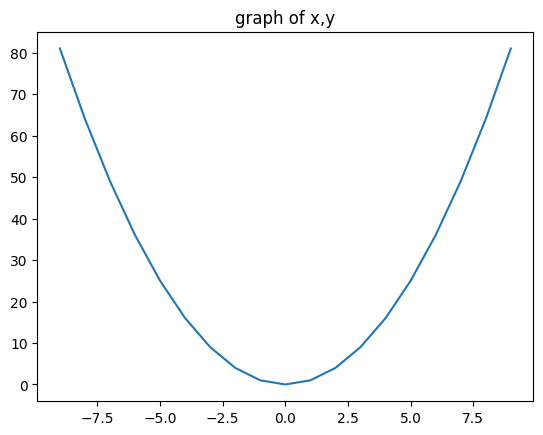

In [5]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.title(f'graph of x,y')
plt.show()

In [6]:
M = np.random.randint(0, 10, size=(5,5))
M

array([[2, 1, 8, 9, 2],
       [6, 8, 0, 1, 5],
       [5, 6, 5, 0, 5],
       [1, 5, 6, 2, 8],
       [6, 4, 5, 3, 8]])

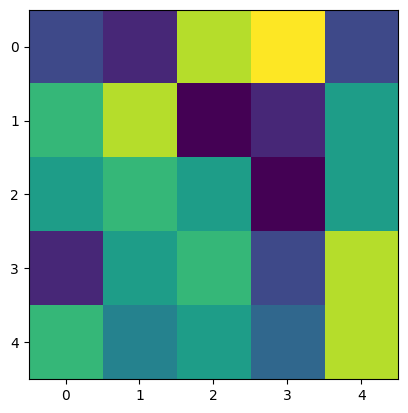

In [7]:
plt.imshow(M)
plt.show()

### 2. Vectors

A **vector** is an ordered list of numbers.

#### 2.1 vector scalar multiplication

In [8]:
v = np.array([3,4,5,6])
s = 3
v*3

array([ 9, 12, 15, 18])

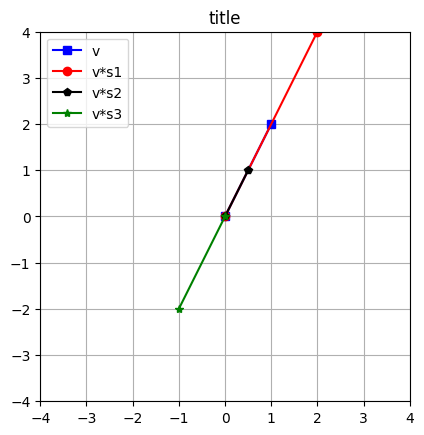

In [9]:
vec2d = np.array([1,2])
s1 = 2
s2 = 0.5
s3 = -1
plt.plot([0,vec2d[0]],[0,vec2d[1]],'bs-',label='v')
plt.plot([0,s1*vec2d[0]],[0,s1*vec2d[1]],'ro-',label='v*s1')
plt.plot([0,s2*vec2d[0]],[0,s2*vec2d[1]],'kp-',label='v*s2')
plt.plot([0,s3*vec2d[0]],[0,s3*vec2d[1]],'g*-',label='v*s3')

plt.axis('square')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.grid()
plt.legend(loc='upper left')
plt.title(f'title')
plt.show()

#### 2.2. vector norm

$||v|| = \sqrt{\sum_{i=1}^n{v_i^2}}$

In [10]:
import math

def norm(v):
    return math.sqrt(sum([x**2 for x in v]))

v = np.array([1,2,3,4,5])
print(norm(v))
print(np.linalg.norm(v))

7.416198487095663
7.416198487095663


#### 2.3. vector dot product

The **dot product** of two vectors is the inner product of vectors $v$ and $w$:

$v^{T}w = v.w$

Can be calculated using `dot` or `@` symbol or by summing the result of an `np.multiply`

In [11]:
v1 = np.array([15,6,2])
v2 = np.array([3,3,5])
print(np.dot(v1,v2))
print(v1 @ v2)
print(sum(np.multiply(v1,v2)))

73
73
73


A dot product of 0 means the two vectors are **orthogonal**.

In [12]:
v3 = np.array([-4,3,1])
v4 = np.array([2,3,-1])
np.dot(v3,v4)

0

`v3` and `v4` are orthogonal because their dot product is 0.

#### 2.4. vector cross product

Not used much in Python

$v \times w$

In [13]:
np.cross(v3,v4)

array([ -6,  -2, -18])

#### 2.5. orthogonal vector decomposition

Let's plot multiple vectors in one plot function:

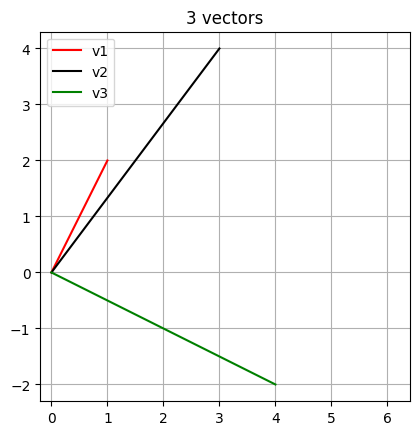

In [14]:
def plotVectors(vs):
    colors = ['r','k','g','b']
    for i, v in enumerate(vs):
        offset = i % len(colors)
        plt.plot([0,v[0]],[0,v[1]],colors[offset],label=f'v{i+1}')
    plt.axis('square')
    plt.grid()
    plt.legend(loc='upper left')
    plt.title(f'{len(vs)} vectors')
    plt.show()
    
v1 = np.array([1,2])
v2 = np.array([3,4])
v3 = np.array([4,-2])
plotVectors([v1,v2,v3])

Orthogonal vector decomposition 

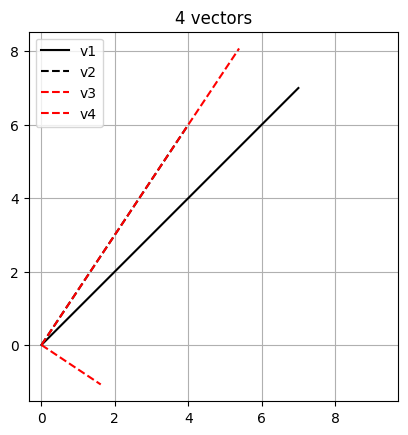

In [15]:
def getOrthogonalVectors(a,b):
    parallel = b * ((a.T @ b) / (b.T @ b))
    perpendicular = a - parallel
    assert(np.dot(parallel,perpendicular) < 0.0001)
    return parallel, perpendicular
    
def plotOrthogonalVectorDecomposition(a,b):
    colors = ['k-','k--','r--','r--']
    parallel, perpendicular = getOrthogonalVectors(a,b)
    vs = [a, b, parallel, perpendicular]
    for i, v in enumerate(vs):
        offset = i % len(colors)
        plt.plot([0,v[0]],[0,v[1]],colors[offset],label=f'v{i+1}')
    plt.axis('square')
    plt.grid()
    plt.legend(loc='upper left')
    plt.title(f'{len(vs)} vectors')
    plt.show()

v1 = np.random.randint(0, 20, size=(1,2))
v2 = np.random.randint(0, 20, size=(1,2))
plotOrthogonalVectorDecomposition(*v1, *v2)

### 3. Matrices

Different types of matrix:
* **Symmetric matrix** - all off diagonal elements are mirrored.  Matrix equals its transpose
* **Identity matrix $I_N$** - all off diagonal elements are 0, diagonal elements are 1.
* **Diagonal matrix $I_N$** - all off diagonal elements are 0, diagonal elements can be anything.
* **Singular matrix** - has no inverse

In [16]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [17]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [18]:
M = np.array([[1,2,3],[4,5,6],[7,8,9]])
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

#### 3.1 matrix transpose

A **transpose** operation flips rows into columns

In [19]:
M.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

Matrix multiplication $AB$ only works if inner dimension  if A is M x N and B is N x K

Note this is why we transpose vectors before multiplying.  Consider:

In [20]:
v1 = np.array([[1,2,3,4,5]])
v2 = np.array([[1,2,3,4,5]])

We can multiply in two ways:
1. `v1.T` multiplied by `v2` => 5 x 1 multiplied by 1 x 5 => **5 x 5** output
2. `v1` multiplied by `v2` => 1 x 5 multiplied by 5 x 1 => **1 x 1** output

Let's try the first way:

In [21]:
np.matmul(v1.T,v2)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

Equivalent operation using @ symbol:

In [22]:
v1.T @ v2

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

Now let's try the other way:

In [23]:
v1 @ v2.T

array([[55]])

#### 3.2 symmetrice matrix

A symmetric matrix is one that is the same as its transpose.  Multiplying any matrix by its transpose produces a symmetric matrix.  Consider $A^TA$.  Let's take its transpose and expand using the $(LIVE)^T = E^TV^TI^TL^T$ rule:

$(A^TA)^T => A^TA^{TT} => A^TA \space\space QED$

#### 3.3 matrix inverse

In [24]:
A = np.random.randn(4,4)
Ainv = np.linalg.inv(A)

In [25]:
A

array([[ 0.945912  , -0.4043656 , -1.29100825,  2.1319899 ],
       [ 1.77449606,  0.01342162,  3.20645762, -0.59494767],
       [-0.96279342, -1.31040072,  2.71425133, -0.06725425],
       [ 0.28087585, -0.29247418,  0.79105545, -0.52185306]])

In [26]:
Ainv

array([[ 0.25809999,  0.11480208, -0.29303262,  0.96133006],
       [-0.41017583,  0.49798549, -0.13459157, -2.22613271],
       [-0.10113461,  0.28651969,  0.20517033, -0.76627082],
       [ 0.21549516,  0.21701548,  0.22872316, -1.31274875]])

`imshow` can help you visualise matrices.  Useful for inverse

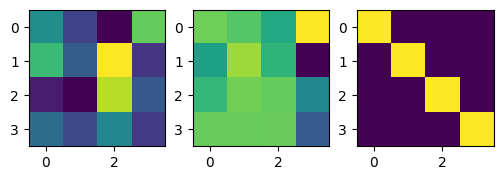

In [27]:
fig, ax = plt.subplots(1,3,figsize=(6,5))
ax[0].imshow(A)
ax[1].imshow(Ainv)
ax[2].imshow(A@Ainv)
plt.show()

Let's consider a singular matrix:

#### 3.4 singular matrix

A **singular** matrix $M$ has no inverse.  Therefore $det|M| = 0$

In [28]:
v = np.array([[1,1],[1,1]])
np.linalg.det(v)

0.0

In [29]:
try:
    np.linalg.inv(v)
except Exception as e:
    print(f'Exception: "{e}"')

Exception: "Singular matrix"
